In [ ]:
# Import Dependencies
import pandas as pd
pd.options.mode.chained_assignment = None
from datetime import timedelta, date
import numpy as np
import matplotlib.pyplot as plt
import requests as requests
import time
from scipy import stats 
#import linregress
import json

from scipy.stats import linregress

from sklearn import datasets

In [2]:
#CDC COVID-19 mortality rate in the US by age and sex url
mort_url = "https://data.cdc.gov/resource/9bhg-hcku"

In [3]:
df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$limit=1000000")


In [4]:
#Check number of rows to make sure all datas are included
len(df_mort)

68850

In [5]:
# Displaying one record 
df_mort.iloc[500]

data_as_of                                                 2021-10-20T00:00:00.000
start_date                                                 2020-01-01T00:00:00.000
end_date                                                   2021-10-16T00:00:00.000
group                                                                     By Total
state                                                         District of Columbia
sex                                                                         Female
age_group                                                              25-34 years
covid_19_deaths                                                                NaN
total_deaths                                                                 116.0
pneumonia_deaths                                                              10.0
pneumonia_and_covid_19_deaths                                                  NaN
influenza_deaths                                                               0.0
pneu

In [6]:
#data frame with required fields
new_df=df_mort[["group","year","month","state","sex","age_group","covid_19_deaths",
                "total_deaths"]]
pd.options.display.float_format = "{:.0f}".format

In [64]:
new_df

,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
70,By Total,NaN,NaN,Alabama,Male,0-17 years,NaN,786
74,By Total,NaN,NaN,Alabama,Male,18-29 years,57,1593
76,By Total,NaN,NaN,Alabama,Male,30-39 years,171,2081
78,By Total,NaN,NaN,Alabama,Male,40-49 years,418,3363
80,By Total,NaN,NaN,Alabama,Male,50-64 years,1800,13151
...,...,...,...,...,...,...,...,...
68792,By Month,2021,9,Puerto Rico,Female,40-49 years,NaN,27
68794,By Month,2021,9,Puerto Rico,Female,50-64 years,30,124
68796,By Month,2021,9,Puerto Rico,Female,65-74 years,25,180
68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,297


In [8]:
new_df.drop(new_df.loc[(new_df["month"] == 10)&(new_df["year"] == 2021)].index, inplace=True)

In [178]:
#Dropping data for age_groups -"Under 1 year", "1-4 years", "All Ages","5-14 years","15-24 years"
# and "25-34 years" , "35-44 years",  "45-54 years",  "55-64 years"

new_df.drop(new_df.loc[new_df["age_group"]=="Under 1 year"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="1-4 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="All Ages"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="5-14 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="15-24 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="25-34 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="35-44 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="45-54 years"].index, inplace=True) 
new_df.drop(new_df.loc[new_df["age_group"]=="55-64 years"].index, inplace=True)

#Dropping data for total states number
new_df.drop(new_df.loc[new_df["state"]=="United States"].index, inplace=True)
#Dropping data for total sex number
new_df.drop(new_df.loc[new_df["sex"]=="All Sexes"].index, inplace=True)
#Dropping all rows with empty cells
new_df = new_df.dropna()





In [77]:
#check new_df with dropped rows
new_df

,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
9403,By Month,2020,1,Alabama,Male,0-17 years,0,44
9407,By Month,2020,1,Alabama,Male,18-29 years,0,53
9409,By Month,2020,1,Alabama,Male,30-39 years,0,67
9411,By Month,2020,1,Alabama,Male,40-49 years,0,129
9415,By Month,2020,1,Alabama,Male,65-74 years,0,588
...,...,...,...,...,...,...,...,...
68790,By Month,2021,9,Puerto Rico,Female,30-39 years,0,10
68794,By Month,2021,9,Puerto Rico,Female,50-64 years,30,124
68796,By Month,2021,9,Puerto Rico,Female,65-74 years,25,180
68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,297


In [78]:
#checking total deaths 
new_df["covid_19_deaths"].sum()

700603.0

In [79]:
#reset index for dataframe
new_df.reset_index()

,index,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,9403,By Month,2020,1,Alabama,Male,0-17 years,0,44
1,9407,By Month,2020,1,Alabama,Male,18-29 years,0,53
2,9409,By Month,2020,1,Alabama,Male,30-39 years,0,67
3,9411,By Month,2020,1,Alabama,Male,40-49 years,0,129
4,9415,By Month,2020,1,Alabama,Male,65-74 years,0,588
...,...,...,...,...,...,...,...,...,...
11157,68790,By Month,2021,9,Puerto Rico,Female,30-39 years,0,10
11158,68794,By Month,2021,9,Puerto Rico,Female,50-64 years,30,124
11159,68796,By Month,2021,9,Puerto Rico,Female,65-74 years,25,180
11160,68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,297


In [80]:
# Group dataframe by gender and show total deaths for each - Data for Pie Chart
gender_df=new_df.groupby(by=["sex"]).sum()
gender_df = gender_df.drop("year",1)
gender_df = gender_df.drop("month",1)
gender_df



,covid_19_deaths,total_deaths
sex,,
Female,313830,2535160
Male,386773,2809640


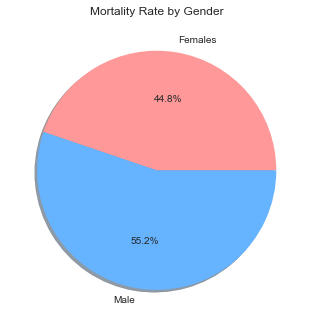

In [177]:
#Create pie chart for number of deaths by gender
labels = "Females", "Male"
sizes=gender_df["covid_19_deaths"]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,colors = colors);
plt.title("Mortality Rate by Gender");
plt.savefig("./mkfg_figures/Mortalityratebygender.png")
plt.show()



In [82]:
#Number of deaths by age group - Data for scatter plot

#Group dataframe by age group
age_group_df=new_df.groupby(by=["age_group"]).sum()

#remove columns year and months
age_group_df = age_group_df.drop("year",1)
age_group_df = age_group_df.drop("month",1)

covid_19_deaths_sum = age_group_df["covid_19_deaths"].sum()
total_deaths_sum = age_group_df["total_deaths"]

age_group_df

,covid_19_deaths,total_deaths
age_group,,
0-17 years,0,38385
18-29 years,1673,48869
30-39 years,7921,80287
40-49 years,24726,165547
50-64 years,125340,919808
65-74 years,160076,1128117
75-84 years,186964,1353715
85 years and over,193903,1610072


In [83]:
#Slice the dataframe for linear regression

df2 = age_group_df['covid_19_deaths'].to_frame(name = 'sum').reset_index()
pd.options.display.float_format = "{:.0f}".format
#Check new dataframe
df2



,age_group,sum
0,0-17 years,0
1,18-29 years,1673
2,30-39 years,7921
3,40-49 years,24726
4,50-64 years,125340
5,65-74 years,160076
6,75-84 years,186964
7,85 years and over,193903


The r squared value : 0.9501650027871453


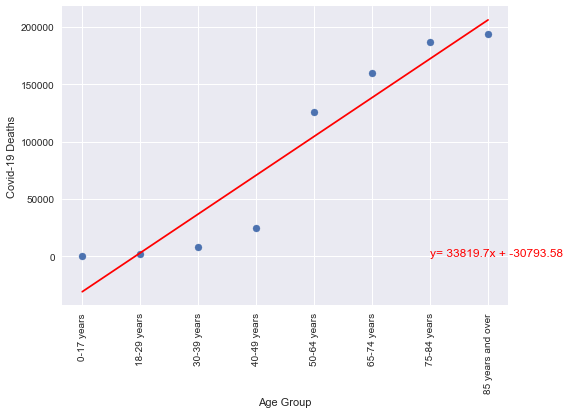

In [101]:

#Plot Linear regression
df2 = age_group_df['covid_19_deaths'].to_frame(name = 'sum').reset_index()


x = np.array(df2.iloc[:,0].index.tolist())

y=np.array(df2.iloc[:,1].astype(float).to_list())


xticks_name=df2.iloc[:,0]

x_pos = np.arange(len(xticks_name))

 
# Create scatter plot
plt.xticks(x_pos, xticks_name,rotation=90)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x,y)

vc_fit = vc_slope * x + vc_int
print(f"The r squared value : {vc_r}")
line_eq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x,y)

plt.plot(x,vc_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Age Group')
plt.ylabel('Covid-19 Deaths')
plt.savefig("./mkfg_figures/Mortalityratebyagegroup.png")
plt.style.use("seaborn")
plt.show()

In [85]:
#Number of deaths by state - Data horizontal bar graph
state_df=new_df.groupby(by=["state"]).sum()
state_df.loc['New York'] += state_df.loc['New York City']
state_df.drop(['New York City'], inplace=True)
state_df = state_df.drop("year",1)
state_df = state_df.drop("month",1)


In [102]:
#check new dataframe
state_df.head()

,covid_19_deaths,total_deaths
state,,
Alabama,14375,102035
Alaska,242,3645
Arizona,17973,126092
Arkansas,7852,56184
California,73272,553310


In [158]:
desc_state_df= state_df.sort_values("covid_19_deaths",ascending=False)

In [159]:
# Mortlaity by State counts sorted in descending order
desc_state_df["covid_19_deaths"]

state
California             73272
Texas                  71756
New York               56458
Florida                55317
Pennsylvania           30340
Ohio                   25962
New Jersey             25534
Illinois               24306
Georgia                23770
Michigan               19661
North Carolina         18864
Arizona                17973
Tennessee              17678
Indiana                15443
Alabama                14375
Missouri               14221
Massachusetts          13842
Virginia               12707
Louisiana              12389
South Carolina         12381
Maryland               10857
Oklahoma               10562
Kentucky                9898
Mississippi             9718
Wisconsin               8967
Connecticut             8242
Minnesota               8038
Arkansas                7852
Colorado                7791
Washington              7389
Nevada                  7268
Iowa                    6463
Kansas                  5614
New Mexico              4280
Oregon  

In [160]:
sorted_state_df.iloc[0:5]
top5states_df=sorted_state_df.head()


<ipython-input-174-9cf8afea27b1>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


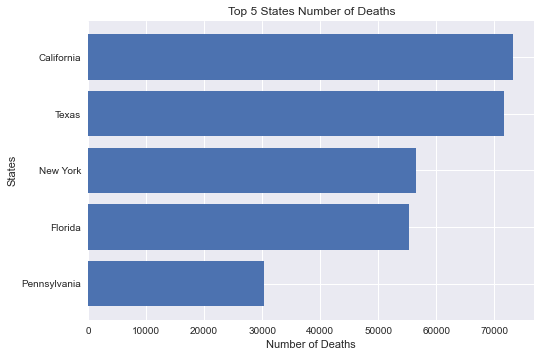

In [174]:
#height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:10].to_string(index=False,header=False)
height=desc_state_df["covid_19_deaths"].astype(int).iloc[0:5].to_list()
bars=desc_state_df.index.tolist()[0:5]
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
ax=plt.subplot()
ax.invert_yaxis() 
# Show graphic
plt.ylabel("States")
plt.xlabel("Number of Deaths")
plt.title("Top 5 States Number of Deaths")
plt.savefig("./mkfg_figures/Mortalityratebystate-top5.png")
plt.show()

#plot = update_df.plt.barh(y='covid_19_deaths', figsize=(7, 7), title="Mortlaity by State counts sorted in descending order")

        

<ipython-input-173-ffc6f530b72d>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


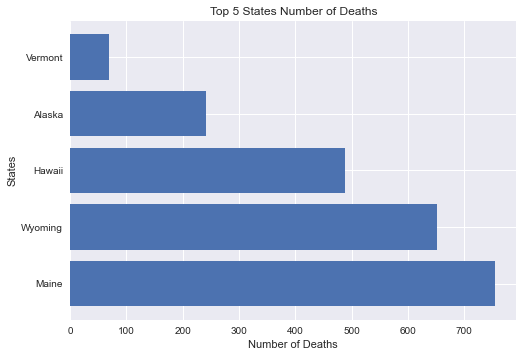

In [173]:
asc_state_df= state_df.sort_values("covid_19_deaths",ascending=True)

#height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:10].to_string(index=False,header=False)
height=asc_state_df["covid_19_deaths"].astype(int).iloc[0:5].to_list()
bars=asc_state_df.index.tolist()[0:5]
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
ax=plt.subplot()
ax.invert_yaxis() 
# Show graphic
plt.ylabel("States")
plt.xlabel("Number of Deaths")
plt.title("Top 5 States with lowest number of Deaths")
plt.savefig("./mkfg_figures/Mortalityratebystate-low5.png")
plt.show()



In [106]:
#Number of deaths for Gender types for different age groups - Stacked bar graph

gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
gender_agegroup_df = gender_agegroup_df.drop("year",1)
gender_agegroup_df = gender_agegroup_df.drop("month",1)

In [92]:
#check new dataframe
gender_agegroup_df

covid_19_deaths  total_deaths
sex    age_group                                       
Female 0-17 years                       0         15804
       18-29 years                    589         13275
       30-39 years                   2657         23575
       40-49 years                   8367         54497
       50-64 years                  45992        339439
       65-74 years                  63572        464811
       75-84 years                  81811        641122
       85 years and over           110842        982637
Male   0-17 years                       0         22581
       18-29 years                   1084         35594
       30-39 years                   5264         56712
       40-49 years                  16359        111050
       50-64 years                  79348        580369
       65-74 years                  96504        663306
       75-84 years                 105153        712593
       85 years and over            83061        627435

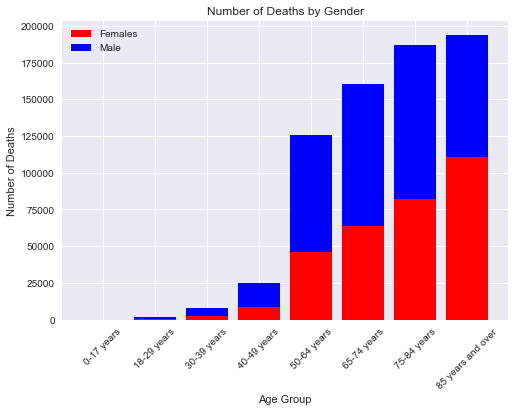

In [107]:
# Number of deaths by age group - Data for stack bars

x=gender_agegroup_df.xs('Female',level='sex').index.to_list()
y1=gender_agegroup_df.xs('Female',level='sex')["covid_19_deaths"].astype(int).to_list()
y2=gender_agegroup_df.xs('Male',level='sex')["covid_19_deaths"].astype(int).to_list()

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xticks(rotation = 45)

plt.ylabel("Number of Deaths")
plt.xlabel("Age Group")
plt.title("Number of Deaths by Gender")
# Show graphic
plt.legend(labels,loc='upper left')
plt.savefig("./mkfg_figures/NumberofdeathsStackBar.png")
plt.show()




In [109]:
#Number of total death count per year 

Year_group_df=new_df.groupby(by=["year"]).sum()

new_df["covid_19_deaths"].sum()
new_df.groupby(by=["year"]).sum()

,month,covid_19_deaths,total_deaths
year,,,
2020,41637,377862,3075690
2021,22109,322741,2269110


In [110]:
#Number of deaths by Year and months

year_month_df=new_df.groupby(by=["year","month"]).sum()
year_month_df


covid_19_deaths  total_deaths
year month                               
2020 1                    0        263337
     2                    0        231025
     3                 6247        172857
     4                64670        300608
     5                37401        254424
     6                17095        221032
     7                30223        252012
     8                29194        251205
     9                18427        228351
     10               24203        254616
     11               52640        288536
     12               97762        357687
2021 1               104699        363146
     2                47599        267671
     3                22163        246847
     4                17608        229650
     5                13767        227665
     6                 6679        193300
     7                 9783        202344
     8                46109        275270
     9                54334        263217

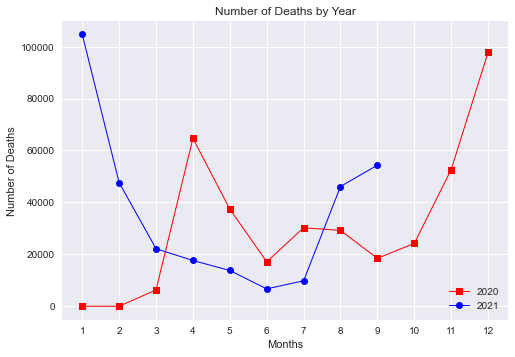

In [155]:
#Create double line graph to show number of deaths by year and month
df_year2020=new_df.loc[new_df["year"]==2020]
df_year2020

df_year2020_1 = df_year2020.groupby(by=["month"]).sum()
df_year2020_1

df_year2020_1.index.astype(int).tolist()
plt.plot(df_year2020_1.index.astype(int).tolist(),df_year2020_1["covid_19_deaths"], marker="s", color="Red", linewidth=1, label="2020")

df_year2021=new_df.loc[new_df["year"]==2021]
df_year2021

df_year2021_1 = df_year2021.groupby(by=["month"]).sum()
df_year2021_1

df_year2021_1.index.astype(int).tolist()

plt.plot(df_year2021_1.index.astype(int).tolist(),df_year2021_1["covid_19_deaths"], marker="o", color="Blue", linewidth=1, label="2021")
plt.xticks(df_year2020_1.index.astype(int).tolist())
plt.title("Number of Deaths by Year")
plt.xlabel("Months")
plt.ylabel("Number of Deaths")

plt.legend()

plt.savefig("./mkfg_figures/lineplotbyyear.png")

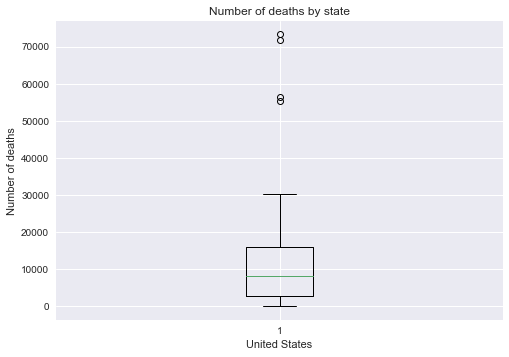

In [194]:
state_box = state_df["covid_19_deaths"]

fig1, ax1 = plt.subplots()
ax1.set_title('Number of deaths by state')
ax1.set_ylabel('Number of deaths')
ax1.set_xlabel('United States')
ax1.boxplot(state_box)
plt.show()

In [196]:
quartiles = state_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of number of deaths is: {lowerq}")
print(f"The upper quartile of number of deaths is: {upperq}")
print(f"The interquartile range of number of deaths is: {iqr}")
print(f"The the median of number of deaths is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of number of deaths is: 2694.75
The upper quartile of number of deaths is: 16001.75
The interquartile range of number of deaths is: 13307.0
The the median of number of deaths is: 8140.0 
Values below -17265.75 could be outliers.
Values above 35962.25 could be outliers.


In [181]:
state_df

,covid_19_deaths,total_deaths
state,,
Alabama,14375,102035
Alaska,242,3645
Arizona,17973,126092
Arkansas,7852,56184
California,73272,553310
Colorado,7791,73216
Connecticut,8242,46790
Delaware,1504,10237
District of Columbia,1097,6600
